In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# Reading the scraped content and making it a pandas dataframe

employment_rates_df = pd.read_csv('Employment_Rates_Prediction.csv')



print (employment_rates_df)

                    COUNTRY  MANDATORY YEARS OF EDUCATION   PISA  POPULATION  \
0                 Argentina                            14  395.0    44293293   
1           North Macedonia                            13  400.0     2103721   
2    Bosnia and Herzegovina                             9  402.3     3856181   
3                Costa Rica                            13  414.7     4930258   
4                    Mexico                            14  416.0   124574795   
5                   Albania                             9  419.7     3047987   
6                   Uruguay                            14  423.7     3360148   
7                   Romania                            10  428.0    21529967   
8                     Chile                            12  437.7    17789267   
9                    Cyprus                            10  438.0     1221549   
10                    Malta                            11  459.0      416338   
11                  Ukraine             

In [5]:
dataTypeSeries = employment_rates_df.dtypes
 
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
COUNTRY                          object
MANDATORY YEARS OF EDUCATION      int64
PISA                            float64
POPULATION                        int64
LABOUR FORCE                      int64
EMPLOYMENT RATES                float64
dtype: object


In [9]:
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

C:\Users\anu-2\AppData\Local\Temp\ipykernel_7092\1056286347.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.corr()


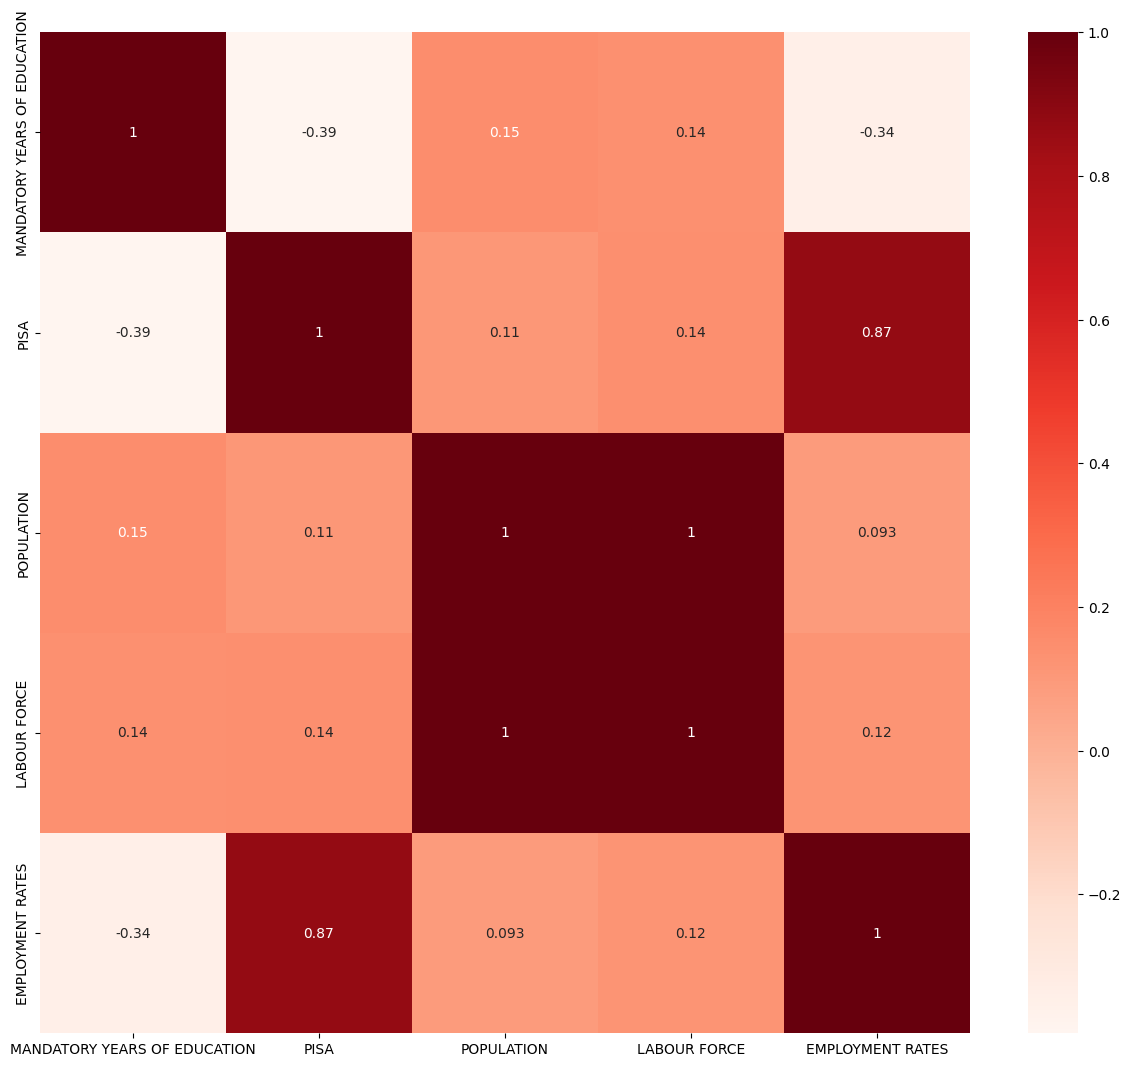

KeyError: 'EMPLOYMENT_RATES'

In [10]:
build_pearson_correlation_matrix_of_dataframe(15,13,employment_rates_df,"EMPLOYMENT_RATES",0.2)

KeyError: 'EMPLOYMENT_RATES'

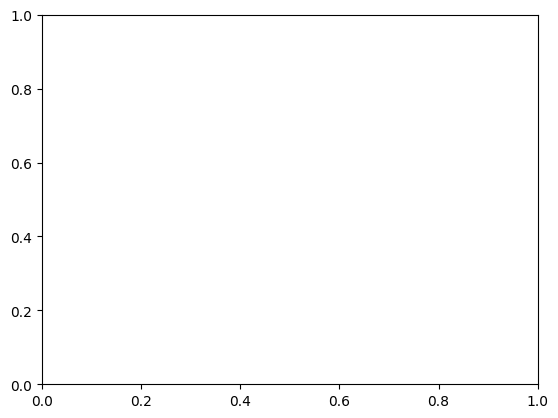

In [11]:
employment_rates_df.plot(kind ='scatter', x = 'PISA', y = 'EMPLOYMENT_RATES')
plt.show()

In [12]:
# Normalizing all the features using mean normalization

employment_rates_df = (employment_rates_df-employment_rates_df.mean())/employment_rates_df.std()

print (employment_rates_df.head())

  COUNTRY  EMPLOYMENT RATES  LABOUR FORCE  MANDATORY YEARS OF EDUCATION  \
0     NaN         -2.912202      0.068828                      1.657648   
1     NaN         -2.374100     -0.483472                      1.084443   
2     NaN         -2.867360     -0.469568                     -1.208379   
3     NaN         -1.107320     -0.442065                      1.084443   
4     NaN         -0.790064      1.251550                      1.657648   

       PISA  POPULATION  
0 -2.049662    0.196684  
1 -1.918401   -0.482881  
2 -1.858021   -0.454654  
3 -1.532493   -0.437353  
4 -1.498365    1.489813  


C:\Users\anu-2\AppData\Local\Temp\ipykernel_7092\3124324932.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  employment_rates_df = (employment_rates_df-employment_rates_df.mean())/employment_rates_df.std()
C:\Users\anu-2\AppData\Local\Temp\ipykernel_7092\3124324932.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  employment_rates_df = (employment_rates_df-employment_rates_df.mean())/employment_rates_df.std()
